<!-- - https://github.com/knadoor/Data-Analyst-Portfolio -->

# Анализ мировой экономики


Имеется набор данных с экономическими показателями 194 стран. 

Я буду анализировать данный датасет, загруженый с веб-сайта [Gapminder](https://www.gapminder.org).  
<div style='margin: 0 0 28px 0'></div>

| Рассмотрим показатели |
| ------------- |
| Потребление электроэнергии на душу населения    | 
| Доход     | 
| Валовый внутренний продукт (ВВП, измеряемый по ППС) за период с 1965 по 2013 год  |

<div style='margin: 55px 0 0px 0'></div>

#### Ответим на такие вопросы, как: 

* Росли ли определенные страны мира по выбранным показателям лучше, чем другие?
* Как отличался рост доходов между двумя крупнейшими развивающимися экономиками, Китаем и Индией?
* Существует ли корреляция между ростом уровня дохода на душу населения и потреблением электроэнергии на человека?

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

from gitly.colab.plot import GitlyPlotter
gitly = GitlyPlotter('github')

This script was made to run only on Google Colab notebooks, other environments was not tested completely
You are not in Colab envirement, make sure you already have Plotly > 4.9.0 and kaleido



## Импорт данных


In [2]:
# Получим наборы данных 
# ВВП по ППС
df_gdp = pd.read_csv("total_gdp_ppp_inflation_adjusted.csv")
df_gdp.rename(columns={'country':'Страна'}, inplace = True)
# Доход гражданина на душу населения в долларах США
df_income = pd.read_csv("income_per_person_gdppercapita_ppp_inflation_adjusted.csv")
df_income.rename(columns={'country':'Страна'}, inplace = True)
# Потребление электроэнергии на человека
df_electricity = pd.read_csv("electricity_use_per_person.csv")
df_electricity.rename(columns={'country':'Страна'}, inplace = True)
# Количество мобильных телефонов - на 100 человек
df_cellphones = pd.read_csv("cell_phones_per_100_people.csv")
df_cellphones.rename(columns={'country':'Страна'}, inplace = True)
# процент интернет-пользователей по странам
df_internet = pd.read_csv("internet_users.csv")
df_internet.rename(columns={'country':'Страна'}, inplace = True)
# Годовое потребление нефти по странам 
df_oil = pd.read_csv("oil_consumption_total.csv")
df_oil.rename(columns={'country':'Страна'}, inplace = True)

In [3]:
# Посмотрим, как выглядит набор данных ВВП
df_gdp.head() 

,Страна,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,...,2.890000e+10,3.240000e+10,3.390000e+10,3.850000e+10,3.950000e+10,4.750000e+10,5.130000e+10,5.490000e+10,6.300000e+10,6.580000e+10
1,Albania,3.260000e+08,3.270000e+08,3.280000e+08,3.300000e+08,3.310000e+08,3.320000e+08,3.340000e+08,3.350000e+08,3.370000e+08,...,2.110000e+10,2.230000e+10,2.350000e+10,2.490000e+10,2.670000e+10,2.760000e+10,2.850000e+10,2.930000e+10,3.010000e+10,3.070000e+10
2,Algeria,3.810000e+09,3.820000e+09,3.830000e+09,3.850000e+09,3.860000e+09,3.870000e+09,3.890000e+09,3.900000e+09,3.920000e+09,...,3.720000e+11,3.920000e+11,3.990000e+11,4.130000e+11,4.210000e+11,4.280000e+11,4.430000e+11,4.540000e+11,4.650000e+11,4.790000e+11
3,Andorra,3.340000e+06,3.350000e+06,3.360000e+06,3.360000e+06,3.370000e+06,3.370000e+06,3.380000e+06,3.380000e+06,3.390000e+06,...,2.820000e+09,3.040000e+09,3.190000e+09,3.190000e+09,3.060000e+09,2.900000e+09,2.810000e+09,2.730000e+09,NaN,NaN
4,Angola,1.020000e+09,1.020000e+09,1.030000e+09,1.030000e+09,1.040000e+09,1.040000e+09,1.050000e+09,1.050000e+09,1.050000e+09,...,6.310000e+10,7.610000e+10,9.020000e+10,1.110000e+11,1.270000e+11,1.300000e+11,1.340000e+11,1.390000e+11,1.460000e+11,1.520000e+11


In [4]:
# Oбщий расход масла
df_oil.head()

,Страна,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Algeria,1290000.0,1690000.0,1580000.0,1680000.0,1780000.0,2030000.0,2290000.0,2510000.0,2740000.0,...,12900000,14000000,14900000,14800000,15800000,16800000,17600000,17700000,19500000,18900000
1,Argentina,22100000.0,22800000.0,23300000.0,23800000.0,24700000.0,22100000.0,23600000.0,23600000.0,23700000.0,...,24200000,24900000,24300000,28100000,28300000,29600000,31900000,31300000,32200000,31900000
2,Australia,15100000.0,18000000.0,19700000.0,21500000.0,22100000.0,24400000.0,25700000.0,26100000.0,27900000.0,...,42500000,43200000,43500000,43700000,46300000,47900000,48200000,48100000,47900000,47800000
3,Austria,5560000.0,6120000.0,6510000.0,7540000.0,8280000.0,9100000.0,10200000.0,11000000.0,11900000.0,...,13400000,13400000,12800000,13400000,12700000,12500000,12700000,12500000,12500000,12700000
4,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4520000,3590000,3310000,3220000,3990000,4170000,4540000,4450000,4530000,4610000


### Первые наблюдения 
Как видим, по некоторым странам и годам отсутствуют данные. Можно объяснить это, что данные либо отсутствовали, либо собирались по конкретной стране за год. Далее преобразуем данные в структуру, которую удобно анализировать. 


In [5]:
# Значения общего ВВП по стране за год
df_gdp2 = pd.melt(df_gdp, id_vars="Страна", var_name="year", value_name="gdp")
df_gdp2.rename(columns={'year':'Год', 'gdp': 'ВВП'}, inplace = True)
df_gdp2.sample(4)

,Страна,Год,ВВП
19399,Zimbabwe,1899,1.570000e+09
4369,Malawi,1822,2.710000e+08
17727,Honduras,1891,8.160000e+08
28766,Eritrea,1948,9.130000e+08


In [6]:
# Измерим доход на душу населения
df_income2 = pd.melt(df_income, id_vars="Страна", var_name="year", value_name="income")
df_income2.rename(columns={'country': 'Страна', 'year':'Год', 'income': 'Доход'}, inplace = True)
df_income2.sample(3)

,Страна,Год,Доход
15969,Samoa,1882,1730
28299,New Zealand,1946,11800
36596,Nepal,1989,1170


In [7]:
# Получим потребление энергии
df_electricity2 = pd.melt(df_electricity, id_vars="Страна", var_name="year", value_name="electricity_consumption")
df_electricity2.rename(columns={'country': 'Страна', 'year':'Год', 'electricity_consumption': 'Потребление энергии'}, inplace = True)
df_electricity2.tail(3) 

,Страна,Год,Потребление энергии
7587,Yemen,2014,220.0
7588,Zambia,2014,717.0
7589,Zimbabwe,2014,609.0


In [8]:
# Получим количество подписок на сотовую связь (на 100 человек) 
df_cellphones2 = pd.melt(df_cellphones, id_vars="Страна", var_name="year", value_name="no_of_cellphones")
df_cellphones2.rename(columns={'country': 'Страна', 'year':'Год', 'no_of_cellphones': 'Кол.мобильных телефонов'}, inplace = True)
df_cellphones2.tail(4) 

,Страна,Год,Кол.мобильных телефонов
11442,Vietnam,2018,147.0
11443,Yemen,2018,53.7
11444,Zambia,2018,89.2
11445,Zimbabwe,2018,89.4


In [9]:
# Процент населения страны, у которого есть активное подключение к Интернету. 
df_internet2 = pd.melt(df_internet, id_vars="Страна", var_name="year", value_name="percent_internet_users")
df_internet2.rename(columns={'country': 'Страна', 'year':'Год', 'percent_internet_users': 'Процент пользователей Интернета'}, inplace = True)
df_internet2.sample(4) 

,Страна,Год,Процент пользователей Интернета
10044,Seychelles,2011,43.2
1867,Netherlands,1969,NaN
10969,Malta,2016,78.1
8522,Tuvalu,2003,NaN


In [10]:
# Получим общий объем потребления сырой нефти в тоннах
df_oil2 = pd.melt(df_oil, id_vars="Страна", var_name="year", value_name="oil_consumption")
df_oil2.rename(columns={'country': 'Страна', 'year':'Год', 'oil_consumption': 'Расход масла'}, inplace = True)
df_oil2.tail(2) 

,Страна,Год,Расход масла
3378,Venezuela,2016,28700000.0
3379,Vietnam,2016,20100000.0


### Объединим наборы данных в один.
> Соберём все значения по странам в один фрейм, для возможности сравнения их.


In [11]:
frames = [df_gdp2, df_income2, df_electricity2, df_cellphones2, df_internet2, df_oil2]
df_merged = reduce(lambda left, right: pd.merge(left, right, on=['Страна','Год'], how='outer'), frames)

# Получим данные с 1965 по 2013 год включительно. В данном диапазоне замечено наименьшее количество отсутствующих данных.
df_merged = df_merged[ (df_merged['Год'] >= '1965') & (df_merged['Год'] <= '2013')]
df_merged.sort_values(by=['Страна', 'Год'], ascending=(True, True), inplace=True)

# Сохраним данные в файл для справки
df_merged.to_csv("output.csv")
df_merged.tail(3)

,Страна,Год,ВВП,Доход,Потребление энергии,Кол.мобильных телефонов,Процент пользователей Интернета,Расход масла
41127,Zimbabwe,2011,1.680000e+10,2170.0,636.0,71.3,8.4,NaN
41321,Zimbabwe,2012,1.850000e+10,2490.0,609.0,96.2,12.0,NaN
41515,Zimbabwe,2013,1.930000e+10,2490.0,629.0,102.0,15.5,NaN


In [12]:
# Получим информацию о столбцах, для дальнейшей работы
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9506 entries, 32010 to 41515
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Страна                           9506 non-null   object 
 1   Год                              9506 non-null   object 
 2   ВВП                              9484 non-null   float64
 3   Доход                            9457 non-null   float64
 4   Потребление энергии              5483 non-null   float64
 5   Кол.мобильных телефонов          7616 non-null   float64
 6   Процент пользователей Интернета  3982 non-null   float64
 7   Расход масла                     3019 non-null   float64
dtypes: float64(6), object(2)
memory usage: 668.4+ KB


In [13]:
# Уберём столбцы – количество мобильных телефонов, процент интернет-пользователей, потребления нефти
df_merged.drop(['Кол.мобильных телефонов', 'Расход масла', 'Процент пользователей Интернета'], axis=1, inplace=True)
df_merged.sample(3)

,Страна,Год,ВВП,Доход,Потребление энергии
41016,Italy,2011,2.060000e+12,36300.0,5510.0
34435,Liechtenstein,1977,1.150000e+09,NaN,NaN
35280,Suriname,1981,3.980000e+09,11000.0,NaN


### Очистка данных
Наблюдаем, имеется большое расхождение между различными измерениями отсутствующих данных. 
Интерполируем для нашего диапазона данные по параметрам. 


<br><br>
В остальном данные выглядят хорошо.

In [14]:
# Функция для заполнения ячеек
def fill_missing(grp):
    res = grp.set_index('Год')\
    .interpolate(method='linear',limit=5)\
    .fillna(method='ffill')\
    .fillna(method='bfill')
    del res['Страна']
    return res
    
# Сгруппируем данные и заполни пропуски 
df = df_merged.groupby(['Страна']).apply(
    lambda grp: fill_missing(grp)
)

# Удалим пустые строки и сохраним файл 
df = df.dropna()
df = df.reset_index()

df.to_csv("output_clean.csv")

df.head()

,Страна,Год,ВВП,Доход,Потребление энергии
0,Albania,1965,6.330000e+09,2990.0,532.0
1,Albania,1966,6.750000e+09,3100.0,532.0
2,Albania,1967,7.200000e+09,3220.0,532.0
3,Albania,1968,7.660000e+09,3330.0,532.0
4,Albania,1969,8.120000e+09,3440.0,532.0


In [15]:
# Проанализируем наш окончательный фрейм данных
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Страна               6762 non-null   object 
 1   Год                  6762 non-null   object 
 2   ВВП                  6762 non-null   float64
 3   Доход                6762 non-null   float64
 4   Потребление энергии  6762 non-null   float64
dtypes: float64(3), object(2)
memory usage: 264.3+ KB


,ВВП,Доход,Потребление энергии
count,6.762000e+03,6762.000000,6762.000000
mean,3.601135e+11,15062.996747,2939.386899
std,1.150131e+12,19456.906979,4158.151598
min,6.290000e+08,312.000000,5.760000
25%,1.920000e+10,3600.000000,312.000000
50%,5.850000e+10,8600.000000,1470.000000
75%,2.360000e+11,19100.000000,4020.000000
max,1.640000e+13,179000.000000,54800.000000


Отсутствующих значений во фрейме данных не имеется. 

Посмотрим на гистограмму, для понимания наших данных. 

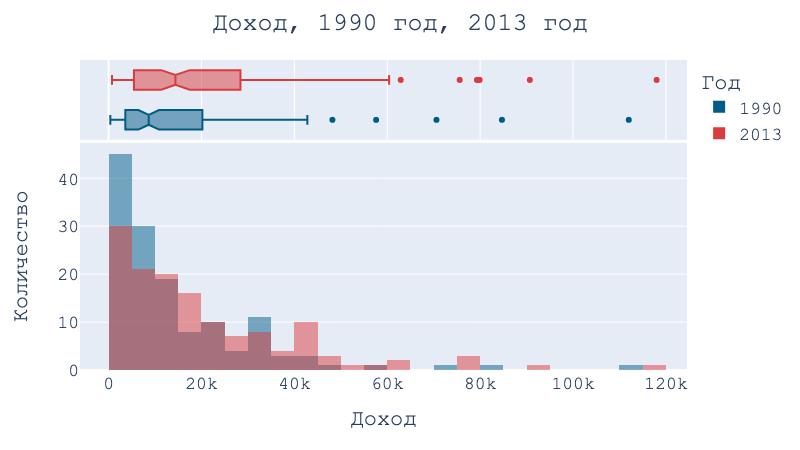

In [16]:
year_plot = df.query("Год in ('2013', '1990' )")

fig = px.histogram(year_plot, x = 'Доход',  marginal ='box', color='Год', color_discrete_sequence=[ '#005B87','#DA3B3B'], barmode = 'overlay')
fig.update_layout(
    title='Доход, 1990 год, 2013 год',
    xaxis_title="Доход",
    yaxis_title="Количество",
    title_x=0.5,
    legend_title="Год",
    font=dict(
        family="Courier New, monospace",
        size=18
    )
)
gitly.show( fig )

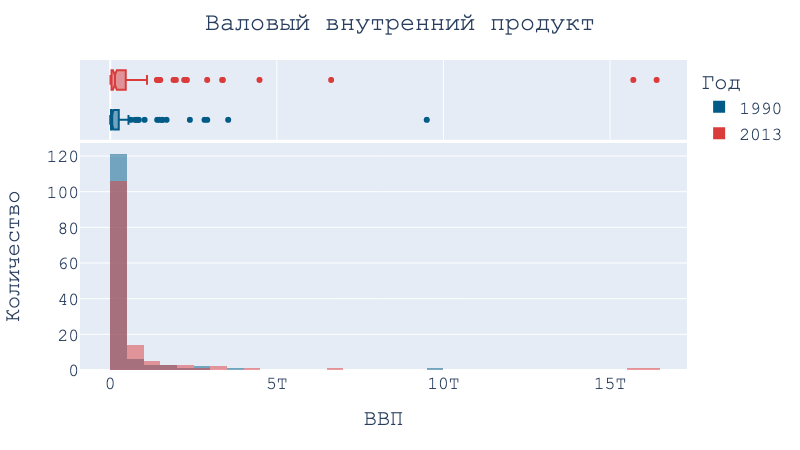

In [17]:
fig = px.histogram(year_plot, x = 'ВВП', marginal = 'box', color='Год', color_discrete_sequence=[ '#005B87','#DA3B3B'], barmode = 'overlay')
fig.update_layout(
    title='Валовый внутренний продукт',
    xaxis_title="ВВП",
    yaxis_title="Количество",
    title_x=0.5,
    legend_title="Год",
    font=dict(
        family="Courier New, monospace",
        size=18
    )
)
gitly.show( fig )

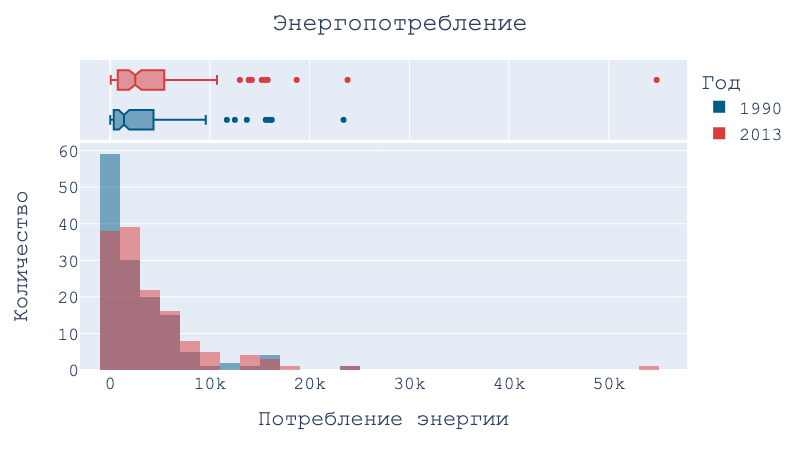

In [18]:
fig = px.histogram(year_plot, x = 'Потребление энергии', marginal = 'box', color='Год', color_discrete_sequence=[ '#005B87','#DA3B3B'], barmode = 'overlay')
fig.update_layout(
    title='Энергопотребление',
    xaxis_title="Потребление энергии",
    yaxis_title="Количество",
    title_x=0.5,
    legend_title="Год",
    font=dict(
        family="Courier New, monospace",
        size=18
    )
)
gitly.show( fig )

In [19]:
# 1-й, 2-й, 3-й квартили за 1990 год
df[df['Год'] == '1990'].quantile([0.25,0.5,0.75])

,ВВП,Доход,Потребление энергии
0.25,2.077500e+10,3622.5,362.75
0.50,6.015000e+10,8645.0,1385.00
0.75,2.497500e+11,20150.0,4307.50


In [20]:
# 1-й, 2-й, 3-й квартили за 2013 год
df[df['Год'] == '2013'].quantile([0.25,0.5,0.75])

,ВВП,Доход,Потребление энергии
0.25,3.687500e+10,5477.5,766.5
0.50,1.390000e+11,14400.0,2505.0
0.75,4.550000e+11,28200.0,5395.0


### Некоторые наблюдения из гистограммы и квартилей
#### Доход на душу населения
Мы можем видеть, что в 1990 и 2013 годах доход сильно смещен вправо. В 2013 году до 75% имеющихся данных свидетельствуют о доходе на душу населения, равным или менее 41 000 долларов. Данные свидетельствуют о том, что лишь небольшое число стран по всему миру имеют высокий доход. 
<br><br>
#### ВВП по паритету покупательной способности
ВВП также смещен вправо, что указывает на то, что экономическое процветание ограничено лишь горсткой стран по сравнению с остальным миром.

Стоит отметить, что страны могут иметь высокий доход на душу населения, но сравнительно более низкий ВВП из-за меньшей численности населения и более высокого уровня жизни.

<br><br>
### Посмотрим в некоторых странах мира рост по выбранным показателям.
Мы изучим экономический рост Китая, Индии, Японии, США по отношению к России и периоду времени между 1965 и 2013 годами ->
#### Более поздний период - данные недоступны

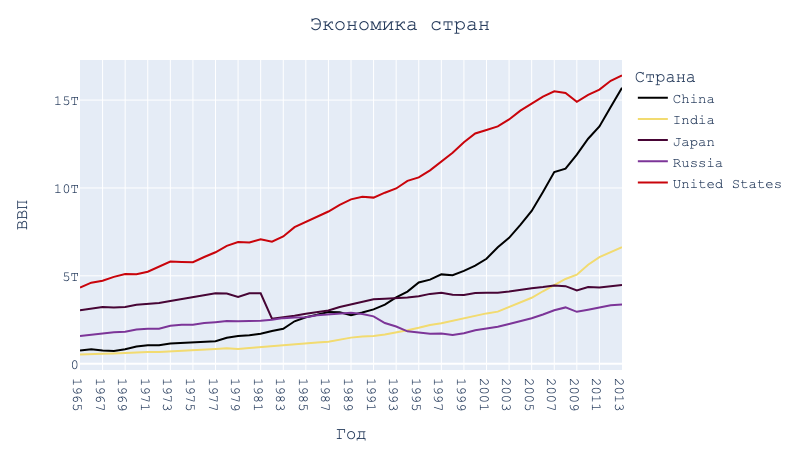

In [21]:
gdp = df.query("Страна in ('United States', 'Japan', 'Russia','China', 'India')")
fig = px.line(gdp, x="Год", y="ВВП", color='Страна', color_discrete_sequence=[ '#000',\
                   '#F2DB70','#470535','#7C3598','#C9040B','#2000E3','#1E00D3','#086FC1'])
fig.update_layout(
    title='Экономика стран',
    title_x=0.5,
    font=dict(
        family="Courier New, monospace",
        size=14
    )
)
gitly.show( fig )

####  На этом графике подробно показаны экономические показатели пяти стран за последние несколько десятилетий, начиная с 1965 года.

##### В России наблюдаем распад СССР в 1991-м году 

##### Япония
 В 1982-м году Япония пережила спад и болезненной пузырь цен на активы. И почти 20 лет спустя Япония достигнула уровня 1981 г. Около 4трлн $ 


#### Китай и Индия
С 1965 по 1980 год наблюдаем почти одинаковые экономические показатели Китая и Индии. Китайские экономические реформы начались в 1978 году и привели к резкому росту ВВП. В 1985 году ВВП Китая был чуть более чем в два раза больше, чем у Индии, и составил 264 миллиарда долларов.

Мы можем видеть на графике, что кривая, изображающая Китай, имеет более крутой положительный градиент, чем у всех остальных стран.

В Индии наблюдаем более скромный рост. Там не наблюдалось таких быстрых всплесков как в Китае. 

#### Соединенные Штаты
Согласно приведенным данным, Соединенные Штаты оставались крупнейшей экономикой мира с 1965 года по сегодняшний день. Глобальный финансовый кризис, который начался в 2007 году и продолжался до 2009 года, вызвал общее сокращение ВВП США на 3,87 процента.

  
<br><br>
### Как отличался рост доходов между двумя крупнейшими развивающимися экономиками, Китаем и Индией?
Мы сравним доходы между двумя странами -две самые быстрорастущие экономики мира – Индия и Китай. И попытаемся понять, как произошли изменения, используя приведенные данные.

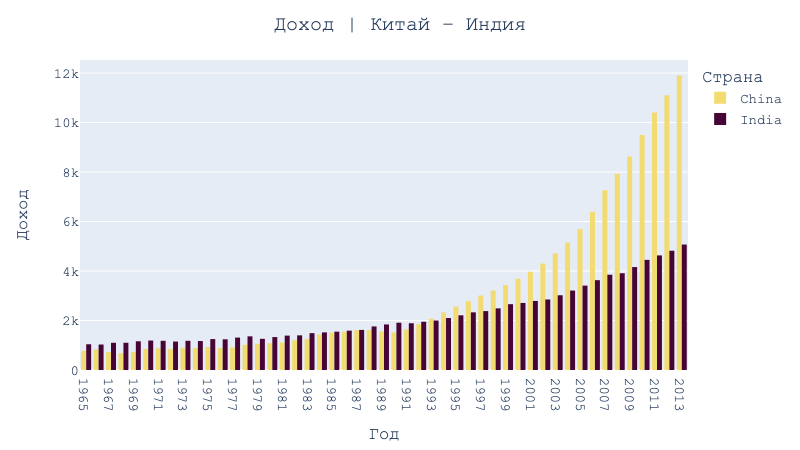

In [22]:
#  сравним доход по странам
countries_plot = df.query("Страна in ( 'China', 'India')")
fig = px.histogram(countries_plot, x="Год", y="Доход",
             color='Страна', barmode='group', color_discrete_sequence=[ '#F2DB70','#470535'],
             height=400)
fig.update_layout(
    title='Доход | Китай – Индия',
    yaxis_title="Доход",
    title_x=0.5,
    font=dict(
        family="Courier New, monospace",
        size=14
    )
)
gitly.show( fig )

Гистограмма показывает, как доход на душу населения менялся с течением времени между Китаем, Индией - которые являются самыми быстрорастущими и развивающимися странами. В обеих странах наблюдаем положительную тенденцию в повышение уровня дохода. 
<br><br>
#### Существует ли корреляция между ростом уровня дохода на душу населения и потреблением электроэнергии на человека?
Ниже построим графики и посмотрим, увеличивается ли потребление электроэнергии человеком при увеличении его уровня дохода. 

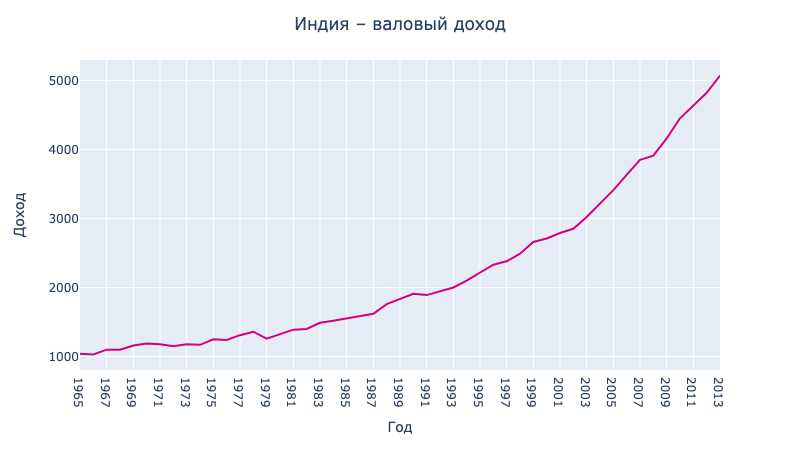

In [23]:
countries_india = df.query("Страна in ( 'India')")
corr_india = countries_india['Доход'].corr(countries_india['Потребление энергии']) 

fig_india = px.line(countries_india, x="Год", y="Доход", color_discrete_sequence=[ '#D50081'])
fig_india.update_layout(title_text='Индия – валовый доход', title_x=0.5)

fig_india1 = px.line(countries_india, x="Год", color_discrete_sequence=[ '#D50081'], y="Потребление энергии")
fig_india1.update_layout(title_text='Индия – Потребление энергии на душу населения', title_x=0.5)
gitly.show( fig_india )

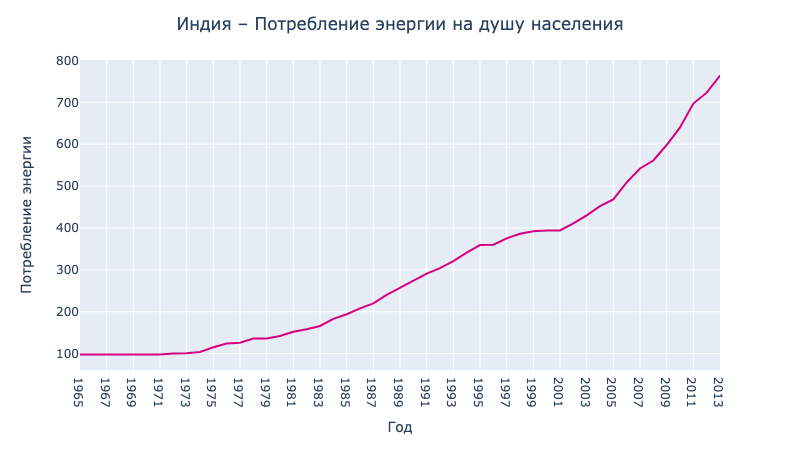

In [24]:
gitly.show( fig_india1 )

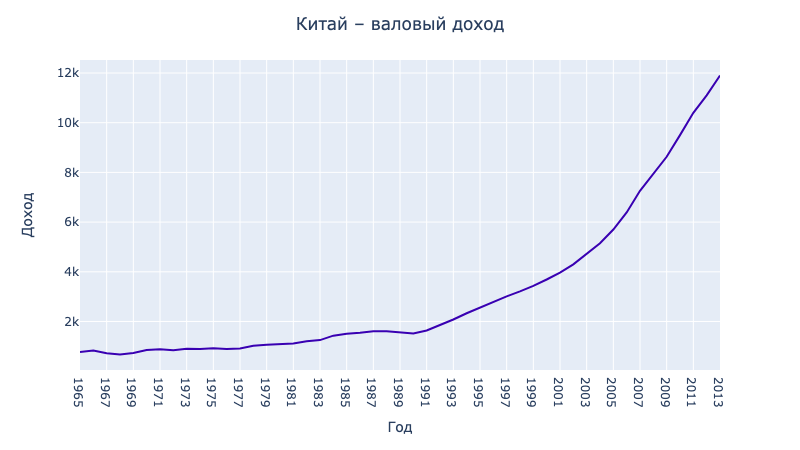

In [25]:
countries_plot_china = df.query("Страна in ( 'China')")
corr_china = countries_plot_china['Доход'].corr(countries_plot_china['Потребление энергии'])
fig_china = px.line(countries_plot_china, x="Год", y="Доход", color_discrete_sequence=[ '#3900B2'])
fig_china.update_layout(title_text='Китай – валовый доход', title_x=0.5)

fig_china1 = px.line(countries_plot_china, x="Год", y="Потребление энергии", color_discrete_sequence=[ '#3900B2'])
fig_china1.update_layout(title_text='Китай – Потребление энергии на душу населения', title_x=0.5)
gitly.show( fig_china )

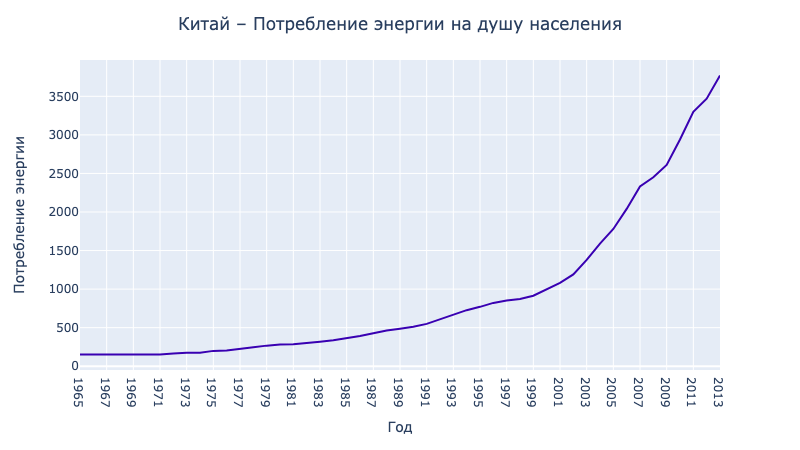

In [26]:
gitly.show( fig_china1 )

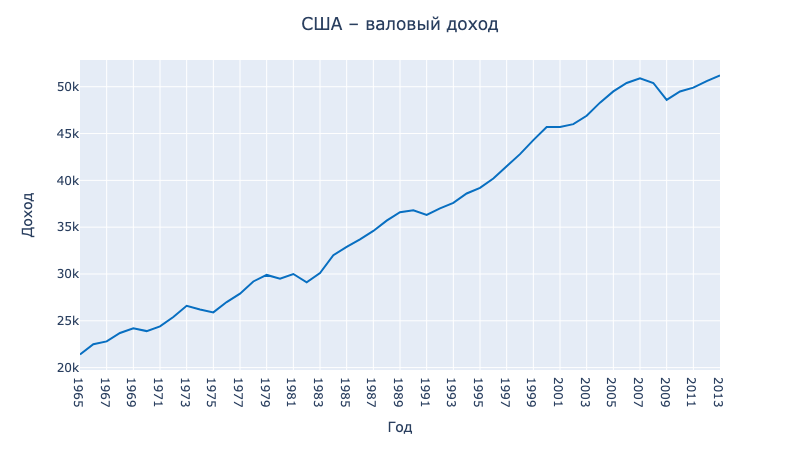

In [27]:
countries_plot_USA = df.query("Страна in ( 'United States')")
corr_USA = countries_plot_USA['Доход'].corr(countries_plot_USA['Потребление энергии'])
fig_usa = px.line(countries_plot_USA, x="Год", y="Доход", color_discrete_sequence=[ '#086FC1'])
fig_usa.update_layout(title_text='США – валовый доход', title_x=0.5)

fig_usa1 = px.line(countries_plot_USA, x="Год", y="Потребление энергии", color_discrete_sequence=[ '#086FC1'])
fig_usa1.update_layout(title_text='США – Потребление энергии на душу населения', title_x=0.5)
gitly.show( fig_usa )

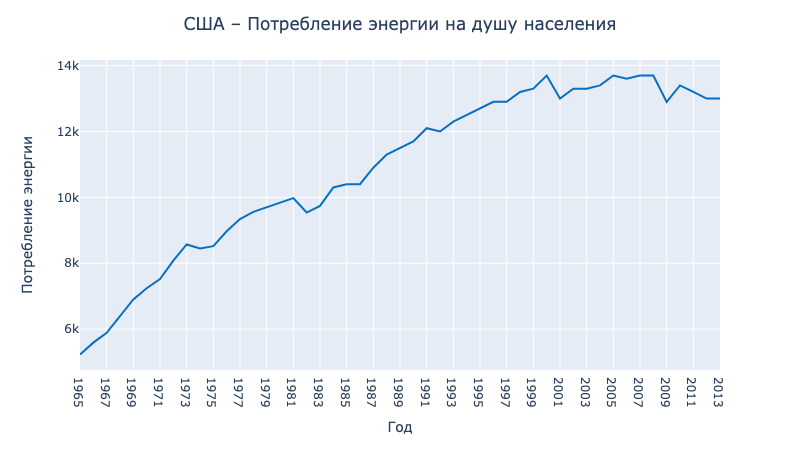

In [28]:
gitly.show( fig_usa1 )

In [29]:
print(f'''Корреляция в Индии - {round(corr_india, 2)}\n
Корреляция в США - {round(corr_USA, 2)}\n
Значение корреляции в Китае - {round(corr_china, 2)}''')

Корреляция в Индии - 0.99

Корреляция в США - 0.94

Значение корреляции в Китае - 1.0


Построенные графики выше и далее, коэффициенты корреляции значений дохода и потребления электроэнергии, говорят нам о достаточно высокой положительной связи. Это свидетельствует о том, что повышение уровня дохода приводит к тому, что человек приобретает больше товаров, что приводит к увеличению потребления электроэнергии. В странах Индии, Китая и США.
<br><br><br>
`Выводы`

В рамках этого проекта по исследованию данных мы изучили экономические показатели в разных странах (Китай, Индия, США, Россия, Япония).

Мы рассмотрели:

- Рост ВВП
- Проанализировал рост доходов между Китаем и Индией с течением времени и соотнес его с экономическим ростом страны
- Изучена взаимосвязь между доходом на душу населения и потреблением электроэнергии на душу населения в Индии, Китае, Соединенных Штатах.